In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import pandas as pd

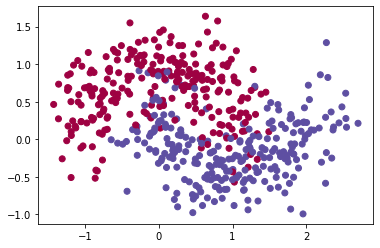

In [ ]:
# generate dataset
np.random.seed(2)
X, y = sklearn.datasets.make_moons(500, True, noise=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [ ]:
num_examples = len(X)
X = np.concatenate((X, np.ones((num_examples, 1))), axis = 1)
y = y.reshape(len(y), 1)

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def predict(X, theta):
  yhat = sigmoid(np.dot(X, theta))
  return np.where(yhat > 0.5, 1, 0)

def cost_function(X, y, theta):
  yhat = sigmoid(np.dot(X, theta))
  return (-1/num_examples) * np.sum((y * np.log(yhat)) + ((1 - y) * np.log(1 - yhat))) 

In [ ]:
def train(X, y, lr, iters):
  # Initialize theta
  theta = np.zeros((3, 1))
  cost_history = []

  for i in range(iters):
    # forward prob
    yhat = sigmoid(np.dot(X, theta))
    cost = cost_function(X, y, theta)
    cost_history.append(cost)

    # backward prop
    dtheta = (1/num_examples) * np.dot(X.T, (yhat - y))
    theta -= lr * dtheta

    if i % 1000 == 0:
      print('iter ' + str(i) + ' cost: ' + str(cost))
  return theta, cost_history

In [ ]:
theta, cost_history = train(X, y, lr=0.01, iters = 10000)

iter 0 cost: 0.6931471805599454
iter 1000 cost: 0.41623643511767794
iter 2000 cost: 0.3747665322720999
iter 3000 cost: 0.358734664979641
iter 4000 cost: 0.3504737842641084
iter 5000 cost: 0.3456644065187094
iter 6000 cost: 0.34268114382171894
iter 7000 cost: 0.3407573328722256
iter 8000 cost: 0.339482988090529
iter 9000 cost: 0.33862179430145783


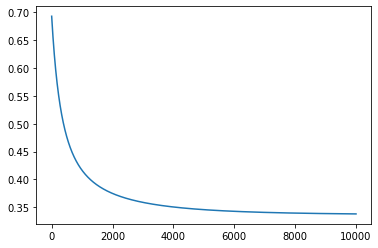

In [ ]:
plt.plot(np.arange(0, 10000), cost_history)

In [ ]:
def plot_decision_boundary(pred_func):
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 0.5
  h = 0.001

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # concat a ones column, then predict the function value for the whole gi
  Z = pred_func(np.c_[np.c_[xx.ravel(), yy.ravel()], np.ones(xx.shape[0]*xx.shape[1])])        
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

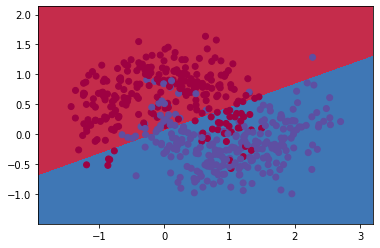

In [ ]:
plot_decision_boundary(lambda X: predict(X, theta))